In [3]:
from PIL import Image
import numpy as np
import os

# Define the rotation angles in degrees
angles = [180]

# Specify the input and output directories
input_dir = "C:/Users/Otiji Lotanna Brian/Desktop/train1/new1"
output_dir = "C:/Users/Otiji Lotanna Brian/Desktop/train1/new1/y"

# Create the output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Loop through the images in the input directory
for filename in os.listdir(input_dir):
    if filename.endswith('.jpeg'):  # Only process JPEG files
        # Load the image and convert to numpy array
        img = Image.open(os.path.join(input_dir, filename))
        img_array = np.array(img)

        # Apply rotation and save the rotated images
        for angle in angles:
            rotated_img = Image.fromarray(np.rot90(img_array, k=int(angle/90)))
            rotated_img.save(os.path.join(output_dir, f'{angle}_{filename}'))

In [8]:
# directory containing the images to be flipped
input_dir = "C:/Users/Otiji Lotanna Brian/Desktop/test"
output_dir = "C:/Users/Otiji Lotanna Brian/Desktop/new"

# loop over each image file in the directory
for filename in os.listdir(input_dir):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        # open the image file
        img = Image.open(os.path.join(input_dir, filename))

        # flip the image horizontally and save
        img_horizontal = img.transpose(method=Image.FLIP_LEFT_RIGHT)
        img_horizontal.save(os.path.join(output_dir, f"{filename}_horizontal.jpg"))

        # flip the image vertically and save
        img_vertical = img.transpose(method=Image.FLIP_TOP_BOTTOM)
        img_vertical.save(os.path.join(output_dir, f"{filename}_vertical.jpg"))

In [165]:
# MOVE FILES
import os
import shutil

source_folder = 'C:/Users/Otiji Lotanna Brian/Desktop/test2'
destination_folder = 'C:/Users/Otiji Lotanna Brian/Desktop/lola work'
keywords = ['horizontal','vertical', '90', '180', '270']

if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

for filename in os.listdir(source_folder):
    for keyword in keywords:
        if keyword in filename:
            shutil.move(os.path.join(source_folder, filename), os.path.join(destination_folder, filename))
        else:
            pass

In [3]:
from PIL import Image, ImageEnhance, ImageFilter
import os
import random

# Define the directory containing the original images
input_dir = "C:/Users/Otiji Lotanna Brian/Desktop/train"

# Define the directory to save the augmented images
output_dir = "C:/Users/Otiji Lotanna Brian/Desktop/new"

# Define the range of blur levels to apply
blur_range = (0, 2)

# Define the range of brightness levels to apply
brightness_range = (0.5, 1.5)

# Loop through each file in the input directory
for filename in os.listdir(input_dir):
    # Open the image
    image = Image.open(os.path.join(input_dir, filename))
    
    # Apply a random blur
    #blur_radius = float(random.uniform(*blur_range))
    image = image.filter(ImageFilter.GaussianBlur(radius=2))
    
    # Apply a random brightness adjustment
    #brightness_factor = float(random.uniform(*brightness_range))
    #enhancer = ImageEnhance.Brightness(image)
    #image = enhancer.enhance(2)
    
    # Save the augmented image to the output directory
    output_path = os.path.join(output_dir, f"{filename}_blur.jpg")
    image.save(output_path)

In [ ]:
source_folder = 'C:/Users/Otiji Lotanna Brian/Desktop/trainew'
destination_folder = 'C:/Users/Otiji Lotanna Brian/Desktop/train'
for filename in os.listdir(source_folder):
    shutil.move(os.path.join(source_folder, filename), os.path.join(destination_folder, filename))

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# create a DataFrame with the actual and predicted scores
data = {'Project': ['Invention', 'Enter Asia', 'Firewall', 'Upgrader', 'Revamp', 'Innovation', 'Automator'],
        'Actual Score': [6.5, 16.0, 9.0, 11.0, 11.0, 15.0, 12.5],
        'Predicted Score': [5.5, 15.4, 7.6, 10.6, 10.6, 15.0, 13.3]}

df = pd.DataFrame(data)

# calculate mean and standard deviation of actual and predicted scores
mean_actual = np.mean(df['Actual Score'])
std_actual = np.std(df['Actual Score'])
mean_predicted = np.mean(df['Predicted Score'])
std_predicted = np.std(df['Predicted Score'])


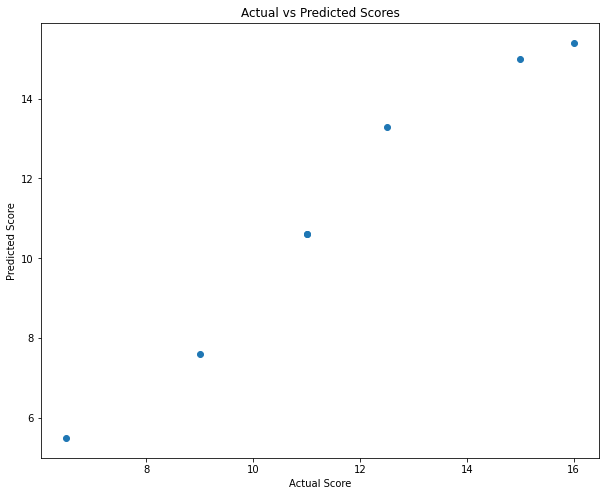

In [14]:
df
plt.figure(figsize=(10, 8))
# create a scatter plot of the actual vs predicted scores
plt.scatter(df['Actual Score'], df['Predicted Score'])

# add labels for the x and y axes and a title for the plot

plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Actual vs Predicted Scores')

# display the plot
plt.show()

In [7]:
# calculate the correlation coefficient
corr = np.corrcoef(df['Actual Score'], df['Predicted Score'])[0, 1]
print("Correlation coefficient:", corr)

Correlation coefficient: 0.9866222419677335


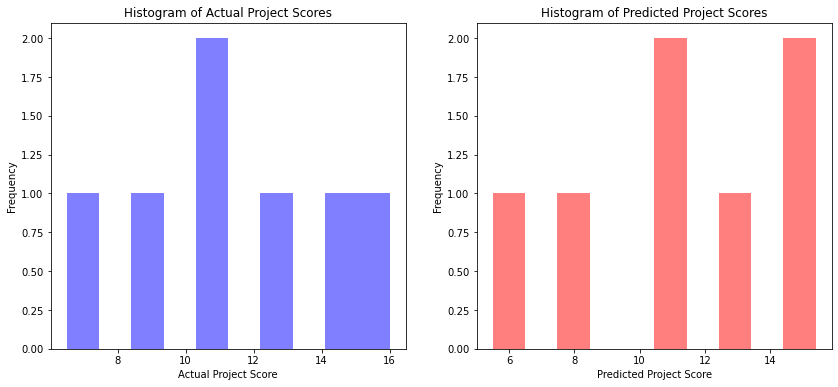

In [17]:
# create separate histograms for the actual and predicted scores
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
ax[0].hist(df['Actual Score'], bins=10, color='blue', alpha=0.5)
ax[0].set_xlabel('Actual Project Score')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Histogram of Actual Project Scores')

ax[1].hist(df['Predicted Score'], bins=10, color='red', alpha=0.5)
ax[1].set_xlabel('Predicted Project Score')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Histogram of Predicted Project Scores')

plt.show()

In [34]:
import cv2

# Load image in color
img = cv2.imread('C:/Users/Otiji Lotanna Brian/Desktop/test2/check.jpg', cv2.IMREAD_COLOR)

# Convert image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply threshold to binary threshold image
thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)[1]

# Find contours of objects in the image
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the original image
cv2.drawContours(img, contours, -1, (0, 255, 0), 2)

# Display the result
cv2.imshow('Result', img)
cv2.waitKey(0)
cv2.destroyAllWindows()
#This script loads the image in color, converts it to grayscale, applies a binary threshold to create a black and white image, finds the contours of objects in the image, and then draws the contours on the original image in green. You can adjust the parameters of the threshold and contour detection functions to get the desired result. You can also save the resulting image using the cv2.imwrite() function.






In [32]:
import cv2
import numpy as np

# Load the image
img = cv2.imread('C:/Users/Otiji Lotanna Brian/Desktop/test2/11.jpg')

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply binary threshold
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Create a mask of the thresholded image
mask = cv2.bitwise_not(thresh)

# Find contours in the mask
contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Create a blank image to draw the contours
contour_img = np.zeros_like(img)

# Loop over the contours and draw them on the contour image
for contour in contours:
    area = cv2.contourArea(contour)
    if area > 500 and area <15000:
        cv2.drawContours(contour_img, [contour], 0, (255, 255, 255), -1)

# Display the contour image
cv2.imshow('Contours', contour_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [29]:
import cv2
import numpy as np

# Load the image in color
img = cv2.imread('C:/Users/Otiji Lotanna Brian/Desktop/test2/11.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply thresholding to create a binary image
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# Apply contouring to find the contours of the oval objects
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a blank mask to hold the oval-shaped objects
mask = np.zeros_like(thresh)

# Loop through each contour
for contour in contours:
    # Calculate the aspect ratio of the contour
    x,y,w,h = cv2.boundingRect(contour)
    aspect_ratio = float(w)/h
    # If the aspect ratio is within the desired range, draw the contour on the mask
    if aspect_ratio > 0 and aspect_ratio < 3:
        cv2.drawContours(mask, [contour], 0, 255, -1)

# Apply the mask to the original image to show only the oval-shaped objects
oval_objects = cv2.bitwise_and(img, img, mask=mask)

# Show the result
cv2.imshow('Oval Objects', oval_objects)
cv2.waitKey(0)
cv2.destroyAllWindows()

# To bring out only oval-shaped objects of interest, you can apply a combination of thresholding, contouring, and shape analysis. Here's a general overview of the process:

Convert the image to grayscale.
Apply thresholding to create a binary image with the oval objects of interest as white pixels on a black background.
Apply contouring to find the contours of the oval objects in the binary image.
For each contour, calculate the aspect ratio, which is the ratio of the major axis to the minor axis. If the aspect ratio is close to 1, the contour is close to a perfect circle, and is not an oval. If the aspect ratio is greater than 1.2 or less than 0.8, the contour is not an oval.
Create a mask that only shows the oval-shaped objects in the original image.

In [34]:
import cv2
import numpy as np

# Load the image in color
img = cv2.imread('C:/Users/Otiji Lotanna Brian/Desktop/test2/11.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply thresholding to create a binary image
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# Apply morphology operations to remove small noise
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=3)

# Apply contouring to find the contours of the ascarid eggs
contours, _ = cv2.findContours(opening, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a blank mask to hold the ascarid eggs
mask = np.zeros_like(thresh)

# Loop through each contour
for contour in contours:
    # Calculate the area of the contour
    area = cv2.contourArea(contour)
    # If the area is within the desired range, draw the contour on the mask
    if area > 1 and area < 90000000:
        cv2.drawContours(mask, [contour], 0, 255, -1)

# Apply the mask to the original image to show only the ascarid eggs
ascaris_eggs = cv2.bitwise_and(img, img, mask=mask)

# Show the result
cv2.imshow('Ascarid Eggs', ascaris_eggs)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [11]:
# Load the image in color
img = cv2.imread('C:/Users/Otiji Lotanna Brian/Desktop/test2/1.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Remove background using median blur
radius = 30
background = cv2.medianBlur(gray, 2*radius+1)
gray = cv2.absdiff(gray, background)

# Threshold the image using Otsu's method
thresh = threshold_otsu(gray)
binary = gray > thresh
binary = clear_border(binary)
binary = binary.astype(np.uint8)
# Perform morphological opening and closing to remove small objects and fill in gaps
kernel = np.ones((3, 3), np.uint8)
binary = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)
binary = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)

# Label the connected components in the binary image
label_image = label(binary)

# Get the properties of each region
regions = regionprops(label_image)

# Find regions that satisfy a condition (e.g. area < 20000)
mask = np.zeros_like(gray)
for region in regions:
    if region.area >10 and region.area < 15000000:
        coords = region.coords
        for coord in coords:
            mask[coord[0], coord[1]] = 255

# Apply the mask to the original image to show only the oval-shaped objects
ascarid_eggs = cv2.bitwise_and(img, img, mask=mask)

# Show the result
cv2.imshow('Ascarid Eggs', ascarid_eggs)
cv2.waitKey(0)
cv2.destroyAllWindows()

NameError: name 'threshold_otsu' is not defined

In [7]:
import cv2
import numpy as np

# Read the image in grayscale
img = cv2.imread('C:/Users/Otiji Lotanna Brian/Desktop/edit/180_111.jpg', cv2.IMREAD_GRAYSCALE)

# Threshold the image to create a binary image
_, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# Apply morphology operations to remove small noise
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=3)

# Apply contouring to find the contours of objects
contours, _ = cv2.findContours(opening, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a blank mask to hold the objects of the given size
mask = np.zeros_like(thresh)

# Define the minimum and maximum size of objects to keep
min_size = 300
max_size = 1500

# Loop through each contour
for contour in contours:
    # Calculate the area of the contour
    area = cv2.contourArea(contour)
    # If the area is within the desired range, draw the contour on the mask
    if area > min_size and area < max_size:
        cv2.drawContours(mask, [contour], 0, 255, -1)

# Apply the mask to the original image to show only the objects of the given size
result = cv2.bitwise_and(img, img, mask=mask)

# Convert the image to color and set the background to white
result = cv2.cvtColor(result, cv2.COLOR_GRAY2BGR)
result[np.where((result == [0,0,0]).all(axis=2))] = [255,255,255]


# Display the result
#cv2.imwrite('C:/Users/Otiji Lotanna Brian/Desktop/test2/check.jpg', result)
cv2.imshow('Result', result)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [45]:

import cv2
import numpy as np

# Load the image
img = cv2.imread('C:/Users/Otiji Lotanna Brian/Desktop/test2/1.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply thresholding to create a binary image
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# Find the contours of the objects in the binary image
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a blank mask to hold the darkest objects
mask = np.zeros_like(thresh)

# Loop through each contour
for contour in contours:
    # Create a bounding rectangle around the contour
    x, y, w, h = cv2.boundingRect(contour)
    
    # Get the region of interest (ROI) in the grayscale image
    roi = gray[y:y+h, x:x+w]
    
    # Get the minimum and maximum pixel values in the ROI
    min_val, max_val, _, _ = cv2.minMaxLoc(roi)
    
    # If the minimum pixel value is less than 50, draw the contour on the mask
    if min_val <1000:
        cv2.drawContours(mask, [contour], 0, 255, -1)

# Apply the mask to the original image to show only the darkest objects
output = cv2.bitwise_and(img, img, mask=mask)

# Threshold the image
thresh_value, thresh_img = cv2.threshold(output, 0, 255, cv2.THRESH_BINARY)

# Invert the image to get black on white
thresh_img = cv2.bitwise_not(thresh_img)
# Show the result
cv2.imshow('Output', thresh_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [94]:
import cv2

# Load the image
img = cv2.imread('C:/Users/Otiji Lotanna Brian/Desktop/test2/10.jpg')
    

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply thresholding to create a binary image
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# Apply morphology to remove noise
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=3)

# Find the contours of the objects
contours, _ = cv2.findContours(opening, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a mask to blur the background
mask = np.zeros_like(gray)

# Draw the contours of the objects on the mask
cv2.drawContours(mask, contours, -1, 255, -1)

# Apply Gaussian blur to the background
background = cv2.GaussianBlur(gray, (55,55), 0)

# Combine the blurred background and the objects in focus
result = cv2.bitwise_and(background, background, mask=cv2.bitwise_not(mask))
result = cv2.bitwise_and(img, img, mask=mask)

# Display the result
cv2.imshow('result', result)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [6]:
import cv2

import cv2
import os
import numpy as np

# Path to the directory containing the images
dir_path = 'C:/Users/Otiji Lotanna Brian/Desktop/train1/new1/newy'
out_path = 'C:/Users/Otiji Lotanna Brian/Desktop/train1/new'

# Create an empty list to store the images
test_image_list = []

# Loop through the files in the directory
for filename in os.listdir(dir_path):
    if filename.endswith('.png' or '.jpeg'):

         # Load the image with 4 channels
        img = cv2.imread(os.path.join(dir_path, filename), cv2.IMREAD_UNCHANGED)

        # Convert the image to 3 channels by discarding the alpha channel
        img = cv2.cvtColor(img, cv2.COLOR_BGRA2BGR)

        # Save the image with 3 channels
        cv2.imwrite((os.path.join(out_path, f"{filename}_channel3.jpeg")), img)

In [8]:
#2ND PROCESS
import os
import cv2

# Define folder path containing the images to crop and resize
folder_path = 'C:/Users/Otiji Lotanna Brian/Desktop/test2'

# Set the desired size of the cropped and resized image
size = (1100, 1200)

# Create a new folder to save the cropped and resized images
new_folder_path = 'C:/Users/Otiji Lotanna Brian/Desktop/test2/done'
if not os.path.exists(new_folder_path):
    os.makedirs(new_folder_path)

# Loop through each image in the folder
for filename in os.listdir(folder_path):
    # Load the image
    img_path = os.path.join(folder_path, filename)
    img = cv2.imread(img_path)

    # Crop the image to a square aspect ratio
    height, width, channels = img.shape
    if height > width:
        y1 = 0
        y2 = height
        x1 = (height - width) // 2
        x2 = x1 + width
    else:
        x1 = 0
        x2 = width
        y1 = (width - height) // 2
        y2 = y1 + height
    cropped_img = img[y1:y2, x1:x2]

    # Resize the image to the desired size
    resized_img = cv2.resize(cropped_img, size)

    # Save the cropped and resized image to the new folder
    new_img_path = os.path.join(new_folder_path, filename)
    cv2.imwrite(new_img_path, resized_img)

AttributeError: 'NoneType' object has no attribute 'shape'

In [51]:
# 1ST PROCESS
import os
import cv2

# Define the input and output directories
input_dir = 'C:/Users/Otiji Lotanna Brian/Desktop/edit/task'
output_dir = 'C:/Users/Otiji Lotanna Brian/Desktop/test2'

# Loop through all the files in the input directory
for filename in os.listdir(input_dir):
    # Load the image
    img = cv2.imread(os.path.join(input_dir, filename))

    # Define the crop area
    x, y, w, h = 98, 98, 346, 346

    # Crop the image
    crop_img = img[y:y+h, x:x+w]

    # Save the cropped image to the output directory
    cv2.imwrite(os.path.join(output_dir, filename), crop_img)

In [9]:
import cv2
import numpy as np

# Load the input images
img1 = cv2.imread('C:/Users/Otiji Lotanna Brian/Desktop/new/11.jpg')
#img2 = cv2.imread('C:/Users/Otiji Lotanna Brian/Desktop/test2/check.jpg')

# Convert images to grayscale
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
#gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# Apply Adaptive Histogram Equalization
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
equalized1 = clahe.apply(gray1)
#equalized2 = clahe.apply(gray2)

# Display the images side by side for comparison
#stacked = np.hstack((gray1, equalized1, gray2, equalized2))
cv2.imshow('Before and After Adaptive Histogram Equalization', equalized1)
cv2.waitKey(0)
cv2.destroyAllWindows()

cv2.imwrite(('C:/Users/Otiji Lotanna Brian/Desktop/test2/12.jpg'), equalized1)

True

In [13]:
#3RD PROCESS
import cv2
import numpy as np
import os

# Define the input and output folder paths
input_folder = 'C:/Users/Otiji Lotanna Brian/Desktop/new'
output_folder = 'C:/Users/Otiji Lotanna Brian/Desktop/edit'

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Loop through all the images in the input folder
for filename in os.listdir(input_folder):
    # Load the input image
    img = cv2.imread(os.path.join(input_folder, filename))
    
    # Convert image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply Adaptive Histogram Equalization
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    equalized = clahe.apply(gray)

    # Save the output image to the output folder
    cv2.imwrite(os.path.join(output_folder, filename), equalized)

In [60]:
#5TH PROCESS
import cv2
import numpy as np
from PIL import Image, ImageEnhance, ImageFilter


# Set directory path
dir_path = 'C:/Users/Otiji Lotanna Brian/Desktop/edit/task'
out_path = 'C:/Users/Otiji Lotanna Brian/Desktop/test2'

# Get list of image file names in directory
file_list = os.listdir(dir_path)

# Initialize empty list for images
train_image_list = []

# Loop through each file in the list
for file in file_list:
    image = Image.open(os.path.join(dir_path, file))
    
    enhancer = ImageEnhance.Contrast(image)
    image = enhancer.enhance(3)
    
    image = image.filter(ImageFilter.GaussianBlur(radius=1.3))

    image.save(os.path.join(out_path, file))


In [51]:
#4TH PROCESS

import os
# Set directory path
dir_path = 'C:/Users/Otiji Lotanna Brian/Desktop/edit'
out_path = 'C:/Users/Otiji Lotanna Brian/Desktop/edit/run'

# Get list of image file names in directory
file_list = os.listdir(dir_path)

# Initialize empty list for images
train_image_list = []

# Loop through each file in the list
for file in file_list:
    # Load the image in color
    img = cv2.imread(os.path.join(dir_path, file),cv2.IMREAD_GRAYSCALE)
    
    # Resize the image to 64x64
    #img_resized = cv2.resize(img, (256, 256))
    
    # Convert the image to grayscale
    #gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
       # Threshold the image to create a binary image
    _, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

    # Apply morphology operations to remove small noise
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
    opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=3)

    # Apply contouring to find the contours of objects
    contours, _ = cv2.findContours(opening, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Create a blank mask to hold the objects of the given size
    mask = np.zeros_like(thresh)

    # Define the minimum and maximum size of objects to keep
    min_size = 300
    max_size = 1500

    # Loop through each contour
    for contour in contours:
        # Calculate the area of the contour
        area = cv2.contourArea(contour)
        # If the area is within the desired range, draw the contour on the mask
        if area > min_size and area < max_size:
            cv2.drawContours(mask, [contour], 0, 255, -1)

    # Apply the mask to the original image to show only the objects of the given size
    result = cv2.bitwise_and(img, img, mask=mask)

    # Convert the image to color and set the background to white
    result = cv2.cvtColor(result, cv2.COLOR_GRAY2BGR)
    result[np.where((result == [0,0,0]).all(axis=2))] = [255,255,255]
    
    cv2.imwrite(os.path.join(out_path, file), result)
    

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\morph.dispatch.cpp:1163: error: (-215:Assertion failed) !_src.empty() in function 'cv::morphologyEx'


In [2]:
import cv2
import numpy as np
from PIL import Image, ImageEnhance, ImageFilter

dir_path = 'C:/Users/Otiji Lotanna Brian/Desktop/edit/run/11.jpg_vertical.jpg'
image = Image.open(dir_path)
    
#enhancer = ImageEnhance.Contrast(image)
#image = enhancer.enhance(3)

#blur_radius = float(random.uniform(*blur_range))
image = image.filter(ImageFilter.GaussianBlur(radius=1.3))

#image.save('C:/Users/Otiji Lotanna Brian/Desktop/test2/work.jpg')    
image.show()

In [13]:
import os

path = 'C:/Users/Otiji Lotanna Brian/Desktop/train1/new1'  # specify the path to the folder
starting_number = 1  # specify the starting number
# enumerate shows the index and the filename of a file
for i, filename in enumerate(os.listdir(path)):
    new_filename = f'{starting_number + i}{os.path.splitext(filename)[1]}'
    if new_filename in os.listdir(path):
        pass
    else:
        os.rename(os.path.join(path, filename), os.path.join(path, new_filename))

SyntaxError: invalid syntax (Temp/ipykernel_15800/3825568281.py, line 2)